In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
duplicated_df = pd.DataFrame({'X': list('ABACA'), 'Y': [1,3,1,4,2]})
duplicated_df

,X,Y
0,A,1
1,B,3
2,A,1
3,C,4
4,A,2


In [4]:
# X, Yの組み合わせで、重複しているかチェックする
duplicated_df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [5]:
duplicated_df.duplicated().any()

True

In [6]:
duplicated_df.drop_duplicates()

,X,Y
0,A,1
1,B,3
3,C,4
4,A,2


In [7]:
# まれに使う。例えば、indexに時系列が入っていて、最新のものだけ残して置きたい場合など
duplicated_df.drop_duplicates(keep='last')

,X,Y
1,B,3
2,A,1
3,C,4
4,A,2


In [8]:
# Xのcolumnだけについて、重複を除外する
duplicated_df.drop_duplicates(subset='X')

,X,Y
0,A,1
1,B,3
3,C,4


In [9]:
duplicated_df.drop_duplicates(subset='X', keep='last')

,X,Y
1,B,3
3,C,4
4,A,2


In [10]:
missing_df = pd.DataFrame({'X': [1,1,2,3], 'Y': [0, 1, None, 3], 'Z': [None, 1, 2, 3]})
missing_df

,X,Y,Z
0,1,0.0,NaN
1,1,1.0,1.0
2,2,NaN,2.0
3,3,3.0,3.0


In [13]:
# pandasでは、Noneが含まれいても、自動的に数値データについてのみ集計してくれる
missing_df.mean()

X    1.750000
Y    1.333333
Z    2.000000
dtype: float64

In [12]:
missing_df.describe()

,X,Y,Z
count,4.000000,3.000000,3.0
mean,1.750000,1.333333,2.0
std,0.957427,1.527525,1.0
min,1.000000,0.000000,1.0
25%,1.000000,0.500000,1.5
50%,1.500000,1.000000,2.0
75%,2.250000,2.000000,2.5
max,3.000000,3.000000,3.0


In [11]:
# Noneを除外する（defaultはaxis=0, 行方向に集計する→Noneがある行を落とす）
missing_df.dropna()

,X,Y,Z
1,1,1.0,1.0
3,3,3.0,3.0


In [12]:
# Noneがある列を落とす
missing_df.dropna(axis=1)

,X
0,1
1,1
2,2
3,3


In [13]:
# Yの列にNoneが含まれている行を落とす
missing_df.dropna(subset=['Y'])

,X,Y,Z
0,1,0.0,NaN
1,1,1.0,1.0
3,3,3.0,3.0


# 欠損値を埋める

In [14]:
fill_missing_df = pd.DataFrame({'X': [0, 1, None, 3], 'Y': [None, 1, 2, 3]}, index=[0, 1, 6, 7])
fill_missing_df

,X,Y
0,0.0,NaN
1,1.0,1.0
6,NaN,2.0
7,3.0,3.0


In [15]:
fill_missing_df.fillna(0)

,X,Y
0,0.0,0.0
1,1.0,1.0
6,0.0,2.0
7,3.0,3.0


In [16]:
fill_missing_df.fillna(10)

,X,Y
0,0.0,10.0
1,1.0,1.0
6,10.0,2.0
7,3.0,3.0


In [17]:
# それぞれのcolumnに対して、いれる値を変えたいときにはdictionaryを使う
fill_missing_df.fillna({'X': 0, 'Y': 10})

,X,Y
0,0.0,10.0
1,1.0,1.0
6,0.0,2.0
7,3.0,3.0


In [18]:
# それぞれの値を、ある決まった値に変換する
fill_missing_df.replace({np.nan: 100, 0: -1})

,X,Y
0,-1.0,100.0
1,1.0,1.0
6,100.0,2.0
7,3.0,3.0


# 欠損値の補間

In [19]:
missing_s = pd.Series([1,2,3, np.nan, 5,6])
missing_s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
dtype: float64

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


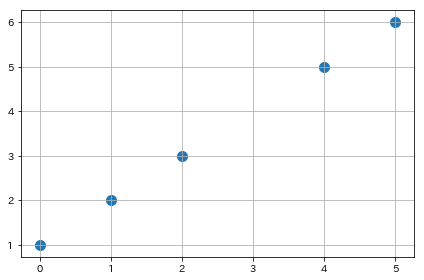

In [20]:
plt.grid()
plt.scatter(missing_s.index, missing_s, s=100)

In [21]:
missing_s.interpolate()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
dtype: float64

In [22]:
fill_missing_df.interpolate()

,X,Y
0,0.0,NaN
1,1.0,1.0
6,2.0,2.0
7,3.0,3.0


In [23]:
fill_missing_df.interpolate('nearest')

,X,Y
0,0.0,NaN
1,1.0,1.0
6,3.0,2.0
7,3.0,3.0


In [24]:
# サンプルデータ作成
t = np.linspace(0, 10, 5)
tt = np.linspace(0, 10, 31)
y = np.sin(t)
missing_sin = pd.merge(pd.DataFrame({'x': t, 'y': y}), pd.DataFrame({'x': tt}), how='outer').set_index('x').sort_index()
missing_sin

,y
x,
0.000000,0.000000
0.333333,NaN
0.666667,NaN
1.000000,NaN
1.333333,NaN
1.666667,NaN
2.000000,NaN
2.333333,NaN
2.500000,0.598472


/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


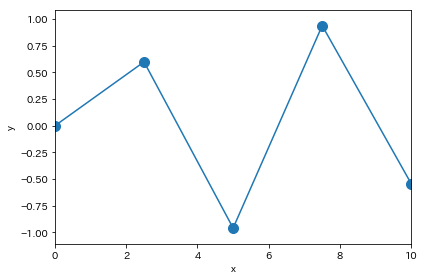

In [25]:
ax = missing_sin.y.dropna().plot()
missing_sin.y.dropna().reset_index().plot.scatter('x', 'y', ax=ax, s=100)

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


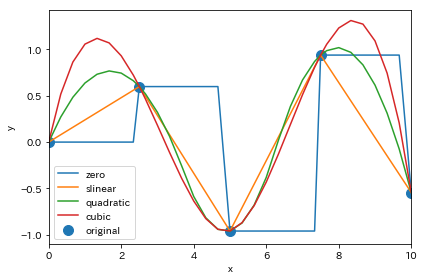

In [26]:
# 欠損値をいくつかの手法で補間していく
missing_sin.y.dropna().reset_index().plot.scatter('x', 'y', s=100, label='original')
missing_sin.y.interpolate('zero').plot(label='zero')
missing_sin.y.interpolate('slinear').plot(label='slinear')
missing_sin.y.interpolate('quadratic').plot(label='quadratic')
missing_sin.y.interpolate('cubic').plot(label='cubic')
plt.legend()

# 外れ値

In [27]:
np.random.seed(seed=20180126)
X = 0.3 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(5, 2))
X = np.r_[X, X_outliers]
outlier_df = pd.DataFrame(X, columns=['X', 'Y'])
outlier_df.head()

,X,Y
0,0.175439,0.104398
1,0.324595,0.225453
2,0.126008,0.401395
3,-0.118929,0.175452
4,0.527542,0.242143


/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


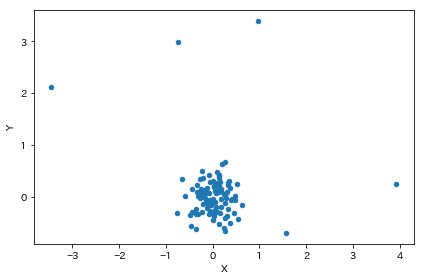

In [28]:
outlier_df.plot.scatter('X', 'Y')

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


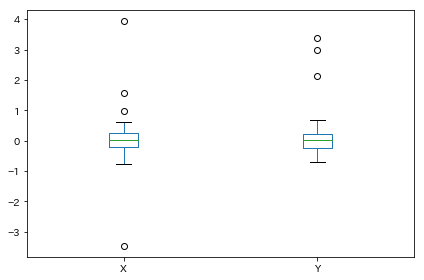

In [29]:
outlier_df.plot.box()

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


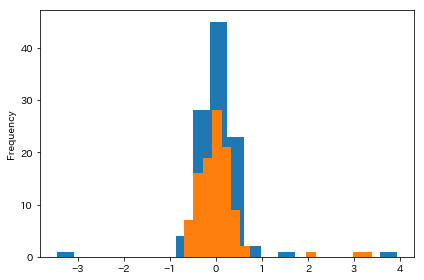

In [30]:
outlier_df.X.plot.hist(bins=20)
outlier_df.Y.plot.hist(bins=20)

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


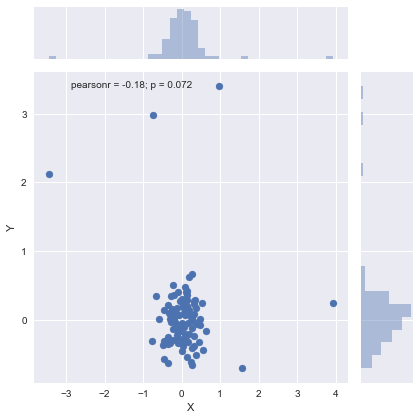

In [31]:
import seaborn as sns
sns.jointplot('X', 'Y', outlier_df)

In [32]:
outlier_df.describe()

,X,Y
count,105.000000,105.000000
mean,0.030958,0.055816
std,0.612746,0.565056
min,-3.456107,-0.696088
25%,-0.201416,-0.234673
50%,0.032552,0.014265
75%,0.241096,0.205007
max,3.934409,3.393803


In [33]:
outlier_sX = outlier_df.X

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


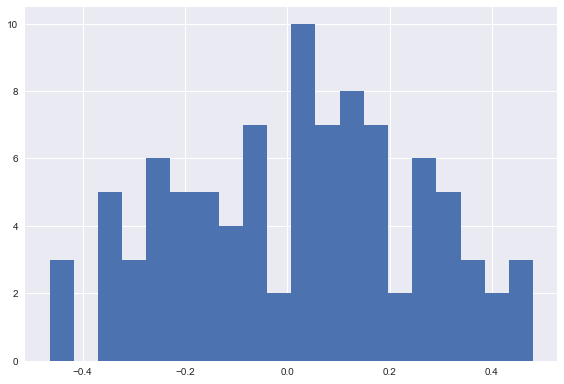

In [34]:
# 両端を5%ずつ除外する
o_5 = outlier_sX.quantile(0.05)
o_95 = outlier_sX.quantile(0.95)
outlier_sX[outlier_sX.between(o_5, o_95)].hist(bins=20)

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


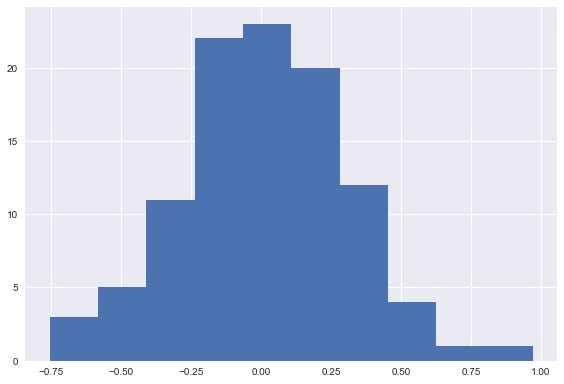

In [35]:
# 平均値から2SD以上離れたものを除外する
x_std = outlier_sX.std()
x_mean = outlier_sX.mean()
outlier_sX[(outlier_sX - x_mean).between(-x_std*2, x_std*2)].hist(bins=10)

In [36]:
outlier_a= [0,1,2,3,4,5,6,7,8,9]
outlier_a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [37]:
# scipyの関数を使う
from scipy.stats.mstats import trim
trim(outlier_a)

masked_array(data = [0 1 2 3 4 5 6 7 8 9],
             mask = False,
       fill_value = 999999)

In [38]:
trim(outlier_a, (2, 8))

masked_array(data = [-- -- 2 3 4 5 6 7 8 --],
             mask = [ True  True False False False False False False False  True],
       fill_value = 999999)

In [39]:
trim(outlier_a, (0.2, 0.2), relative=True)

masked_array(data = [-- -- 2 3 4 5 6 7 -- --],
             mask = [ True  True False False False False False False  True  True],
       fill_value = 999999)

In [40]:
from scipy.stats.mstats import trimboth
trimboth(outlier_a, 0.2)

masked_array(data = [-- -- 2 3 4 5 6 7 -- --],
             mask = [ True  True False False False False False False  True  True],
       fill_value = 999999)

# データ型、不正な値

In [41]:
irr_df = pd.DataFrame([[1,2,3], [4,5,6], list('abc')], columns=['X', 'Y', 'Z'], index=['k', 'l', 'm'])
irr_df

,X,Y,Z
k,1,2,3
l,4,5,6
m,a,b,c


In [42]:
irr_df.describe()

,X,Y,Z
count,3,3,3
unique,3,3,3
top,a,b,3
freq,1,1,1


In [43]:
irr_tdf = irr_df.T
irr_tdf

,k,l,m
X,1,4,a
Y,2,5,b
Z,3,6,c


In [44]:
irr_tdf.describe()

,k,l,m
count,3,3,3
unique,3,3,3
top,3,6,b
freq,1,1,1


In [45]:
irr_tdf.k.dtype

dtype('O')

In [46]:
irr_tdf.k.astype(int)

X    1
Y    2
Z    3
Name: k, dtype: int64

In [47]:
irr_tdf.astype({'k': int, 'l': float})

,k,l,m
X,1,4.0,a
Y,2,5.0,b
Z,3,6.0,c


# 演習1: 年収

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

In [17]:
names = ["age", "workclass", "fnlwgt", "education", "education_num", "martial_status",
        "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
        "hours_per_week", "country", "target"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names=names)
df

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [18]:
df.isnull().any().any()

False

In [19]:
df.country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [20]:
df.workclass.unique() # ただの'?'ではなく' ?'と半角スペースが入っている

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [21]:
# 正規表現を使う
df.workclass.str.contains('\?').value_counts()

False    30725
True      1836
Name: workclass, dtype: int64

In [54]:
# Trueは1としてcountされる
df.workclass.str.contains('\?').sum()

1836

In [55]:
df.apply(lambda s: s.str.contains('\?').sum())

age                  NaN
workclass         1836.0
fnlwgt               NaN
education            0.0
education_num        NaN
martial_status       0.0
occupation        1843.0
relationship         0.0
race                 0.0
sex                  0.0
capital_gain         NaN
capital_loss         NaN
hours_per_week       NaN
country            583.0
target               0.0
dtype: float64

In [56]:
df.replace('?', np.nan).loc[14, 'country']

' ?'

In [57]:
df.replace(' ?', np.nan).loc[14, 'country']

nan

In [58]:
# 正規表現を使って、replaceすることもできる。
#'  ?'だと'?'の前が半角スペースだとreplaceできるが、全角スペースやタブには対応できない
replaced = df.replace('\?', np.nan, regex=True)
replaced.loc[14, 'country']

nan

In [59]:
replaced.apply(lambda s: s.str.contains('\?').sum())

age               NaN
workclass         0.0
fnlwgt            NaN
education         0.0
education_num     NaN
martial_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital_gain      NaN
capital_loss      NaN
hours_per_week    NaN
country           0.0
target            0.0
dtype: float64

In [15]:
df.country.str.contains('?')

NameError: name 'df' is not defined

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


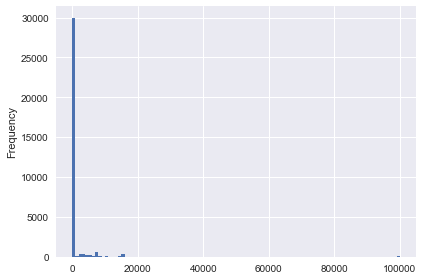

In [60]:
%matplotlib inline
df.capital_gain.plot.hist(bins=100)

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


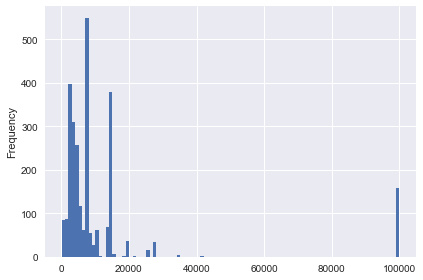

In [61]:
df[df.capital_gain > 0].capital_gain.plot.hist(bins=100)

In [62]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


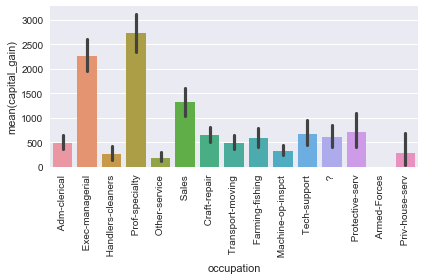

In [63]:
sns.barplot(df.occupation, df.capital_gain)
plt.xticks(rotation=90)

# 演習2: pima

In [64]:
# ピマ・インディアン女性の糖尿病に関するデータセット
columns = ('preg', 'BS', 'dBP', 'Tri_thick(mm)', 'Insulin', 'BMI', 'Familial', 'Age', 'class')
pima = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data',
    header=None, names=columns)
pima.head()

,preg,BS,dBP,Tri_thick(mm),Insulin,BMI,Familial,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


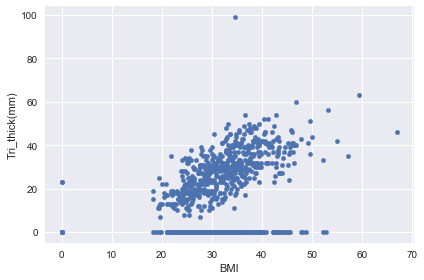

In [65]:
pima[['BMI', 'Tri_thick(mm)']].plot.scatter(x='BMI', y='Tri_thick(mm)')

In [66]:
pima[['BMI', 'Tri_thick(mm)']].corr()

,BMI,Tri_thick(mm)
BMI,1.000000,0.392573
Tri_thick(mm),0.392573,1.000000


In [67]:
def drop_outliers(df):
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        print(f'q1 of {col} is {q1}')
        print(f'q3 of {col} is {q3}')
        iqr = q3 - q1
        
        outlier_min = q1 - iqr * 1.5
        outlier_max = q3 + iqr * 1.5
        print(f'outlier_min is {outlier_min}')
        print(f'outlier_max is {outlier_max}')
        df = df[df[col].between(outlier_min, outlier_max)]
        
    return df

In [68]:
pima_no_outlier = drop_outliers(
    pima[(pima['BMI'] != 0) & (pima['Tri_thick(mm)'] != 0)][['BMI', 'Tri_thick(mm)']])

q1 of BMI is 27.85
q3 of BMI is 36.9
outlier_min is 14.275000000000006
outlier_max is 50.474999999999994
q1 of Tri_thick(mm) is 21.0
q3 of Tri_thick(mm) is 36.0
outlier_min is -1.5
outlier_max is 58.5


/Users/ken/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


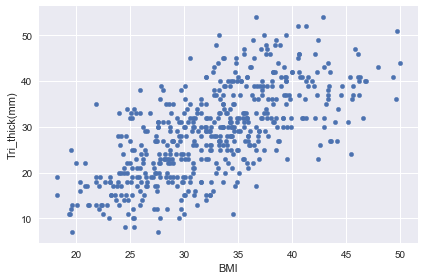

In [69]:
pima_no_outlier.plot.scatter(x='BMI', y='Tri_thick(mm)')

In [70]:
pima_no_outlier.corr()

,BMI,Tri_thick(mm)
BMI,1.00000,0.66631
Tri_thick(mm),0.66631,1.00000
